# 입문자를 위한, 파이썬/R 데이터 분석   

### 판다스(Pandas) ?

[판다스(Pandas)](https://pandas.pydata.org)는 파이썬에서 데이터분석을 위해 사용하는 패키지(Package) 중 하나
( "파이썬으로 엑셀과 같은 파일을 다루기에 최적화된 도구" )

*판다스 장점 :*

  1. 대용량 데이터를 효율적으로 다룰 수 있다. 
  - 엑셀은 데이터의 용량이 100MB만 넘어가면 정상적으로 작동하지 않는데, 판다스는 최소 1GB, 많으면 100GB가 넘는 데이터도 빠른 속도로 처리
  
  2. 복잡한 기능을 구현할 때는 엑셀보다 더 쉽습니다. 
  - 엑셀은 복잡한 기능을 엑셀 전용 함수를 사용하는데, 판다스는 파이썬을 기반으로 동작하기 때문에 엑셀보다 더 쉽다
  
  3. 다른 시스템과 연동하기 쉽습니다. 
  - 엑셀은 분석 결과를 데이터베이스에 집어넣거나 웹 페이지에 띄우는 일을 하기 어렵지만, 판다스는 플라스크([Flask](http://flask.pocoo.org/), 웹 프레임워크)나 SQL알케미([SQL Alchemy](https://www.sqlalchemy.org/), 데이터베이스)를 통해 다른 시스템과 연동하기 편함

*판다스의 기본적인 룰 몇 가지만 숙지하면, 적은 문법 만으로도 굉장히 다양하고 창의적인 방식으로 엑셀(또는 CSV) 파일을 다룰 수 있다.*

### 패키지 읽어오기

In [1]:
# pandas 라는 패키지를 파이썬으로 읽어(import)옵니다. 그리고 pd라는 alias축약어를 사용합니다.
import pandas as pd

## Series  : 1차원 구조

In [2]:
odd = [1, 3, 5, 7, 9]
odd

[1, 3, 5, 7, 9]

In [3]:
pd_odd = pd.Series(odd)
pd_odd

0    1
1    3
2    5
3    7
4    9
dtype: int64

In [4]:
pd_odd.mean()   # 파이썬 List 형태로는 활용할 수 없기 때문에, 
                # pandas의 Series 구조로 변환하여 사용하게 됨 (벡터형태라고 함)

5.0

## DataFrame   : 2차원의 구조 형태

In [151]:
numbers = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
numbers         # 여러줄 있을 때, 가장 마지막 명령에 대한 것만 출력함, print() 활용하면 출력 가능함

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [152]:
numbers[0][0]

1

In [153]:
#pd_numbers = pd.DataFrame(numbers)   # 데이터프레임은 행렬, 2차원 구조라고 함
pd_numbers = pd.DataFrame(numbers, columns=['col1','col2','col3'])   
# 데이터프레임은 행렬, 2차원 구조라고 함
pd_numbers

,col1,col2,col3
0,1,2,3
1,4,5,6
2,7,8,9


In [154]:
print(type(pd_odd))

<class 'pandas.core.series.Series'>


In [155]:
print(type(numbers))

<class 'list'>


In [156]:
print(type(pd_numbers))

<class 'pandas.core.frame.DataFrame'>


In [157]:
pd_numbers['col3']         # Column 기준으로 값을 가져옴, Row 기준으로는 loc 를 사용함

0    3
1    6
2    9
Name: col3, dtype: int64

In [158]:
type(pd_numbers['col1'])

pandas.core.series.Series

In [159]:
# loc == location
# loc[row행]
pd_numbers.loc[2]

col1    7
col2    8
col3    9
Name: 2, dtype: int64

### 파일 읽어오기

판다스에서는 **read_csv**라는 기능으로 [CSV(comma-separated values)](https://en.wikipedia.org/wiki/Comma-separated_values)파일을 읽어올 수 있습니다. 경로를 읽어올 때는 컴퓨터에 있는 파일을 [절대경로와 상대경로](http://88240.tistory.com/122)로 읽어올 수도 있고, 아니면 주소(URL)에서 바로 데이터를 읽어올 수도 있습니다.

In [160]:
# 판다스 실습을 위한 데이터가 저장된 원격 경로를 지정합니다.
file_url = "data/weight_log.csv"

In [161]:
# 위에서 지정한 경로를, 판다스의 read_csv 함수를 활용해 데이터를 읽어옵니다.
# 읽어올 때 '회차' 컬럼을 판다스의 인덱스(Index)로 지정합니다.
# 그리고 이 결과를 data라는 이름의 변수에 할당합니다.
# data = pd.read_csv(file_url, index_col = "회차")
data = pd.read_csv(file_url, index_col="회차")

In [162]:
# data 컬럼을 출력해서 확인합니다.
data

,이름,측정일,몸무게,단위,담당,지점
회차,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구
2,홍길동,2020-03-02,75.7,kg,김길동,관악구
3,홍길동,2020-03-03,76.0,kg,고길동,여의도
4,홍길동,2020-03-04,NaN,kg,고길동,여의도
5,홍길동,2020-03-05,76.2,kg,김길동,강남구
6,홍길동,2020-03-06,75.7,kg,고길동,서초구
7,홍길동,2020-03-07,NaN,kg,고길동,서초구
8,홍길동,2020-03-08,NaN,kg,김길동,서초구
9,홍길동,2020-03-09,75.0,kg,김길동,서초구


여기서 가져온 결과를 판다스의 전문 용어로 데이터프레임([DataFrame](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)) 이라고 합니다.

데이터프레임을 읽어왔으면 여기서 인덱스(index)와 컬럼(columns)을 가져올 수 있습니다.

In [163]:
# 인덱스(index)를 가져옵니다. 여기서 index는 '회차'와 동일합니다.
data.index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='회차')

In [164]:
# 컬럼들(columns)을 가져옵니다.
data.columns

Index(['이름', '측정일', '몸무게', '단위', '담당', '지점'], dtype='object')

또한 ```head```로 상위 5개를, ```tail```으로 하위 5개의 데이터를 가져올 수 있습니다. 여기서 ```head```나 ```tail```안에 숫자를 넣어주면 숫자 만큼의 데이터를 가져옵니다. (가령 ```.head(3)```은 상위 5개가 아닌 상위 3개의 데이터를 가져옵니다.)

In [165]:
# 데이터의 상위 5개를 출력합니다.
data.head()

,이름,측정일,몸무게,단위,담당,지점
회차,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구
2,홍길동,2020-03-02,75.7,kg,김길동,관악구
3,홍길동,2020-03-03,76.0,kg,고길동,여의도
4,홍길동,2020-03-04,NaN,kg,고길동,여의도
5,홍길동,2020-03-05,76.2,kg,김길동,강남구


In [166]:
# head에 갯수(n)를 지정해주면 n개 만큼의 데이터를 가져옵니다,
# 아래 코드는 데이터의 상위 3개를 출력합니다.
data.head(1)

,이름,측정일,몸무게,단위,담당,지점
회차,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구


In [167]:
# 데이터의 하위 5개를 출력합니다.
data.tail()

,이름,측정일,몸무게,단위,담당,지점
회차,,,,,,
5,홍길동,2020-03-05,76.2,kg,김길동,강남구
6,홍길동,2020-03-06,75.7,kg,고길동,서초구
7,홍길동,2020-03-07,NaN,kg,고길동,서초구
8,홍길동,2020-03-08,NaN,kg,김길동,서초구
9,홍길동,2020-03-09,75.0,kg,김길동,서초구


In [168]:
# head(n)과 동일한 원리로, tail(n)은 하위 n개의 데이터를 가져옵니다.
# 아래 코드는 데이터의 하위 7개를 출력합니다.
data.tail(2)

,이름,측정일,몸무게,단위,담당,지점
회차,,,,,,
8,홍길동,2020-03-08,NaN,kg,김길동,서초구
9,홍길동,2020-03-09,75.0,kg,김길동,서초구


## 기본 내장 기능

처음에 배울 기능은 판다스의 기본으로 내장되어있는 기능입니다. 판다스에서는 간단한 수학/통계 연산(ex: 평균, 합 etc)을 포함한 몇몇 기능이 기본으로 탑재되어 있는데, 이 기능을 미리 숙지하고 있으면 차후에 큰 도움이 됩니다.

In [169]:
# .mean() 은 평균을 계산하는 기능입니다.
# 아래 코드는 몸무게의 평균(약 75.8 kg)을 계산 후 출력합니다.
data['몸무게'].mean()

75.83333333333333

In [170]:
# .min() 는 최소치를 계산하는 기능입니다.
# 아래 코드는 몸무게가 가장 적었을 때의 몸무게(75.0 kg)를 계산 후 출력합니다.
data["몸무게"].min()

75.0

In [171]:
# .min() 는 최대치를 계산하는 기능입니다.
# 아래 코드는 몸무게가 가장 많았을 때의 몸무게(76.4 kg)를 계산 후 출력합니다.
data["몸무게"].max()

76.4

또는 ```.describe()```를 통해 전체 숫자 컬럼(정수형, 소수점)의 통계치를 한 눈에 볼 수 있습니다.

In [172]:
# 통계를 낼 수 있는 숫자 데이터(ex: 몸무게)에 한해 주요 통계치를 보여줍니다.
data.describe()

,몸무게
count,6.000000
mean,75.833333
std,0.492612
min,75.000000
25%,75.700000
50%,75.850000
75%,76.150000
max,76.400000


In [173]:
import matplotlib.pyplot as plt

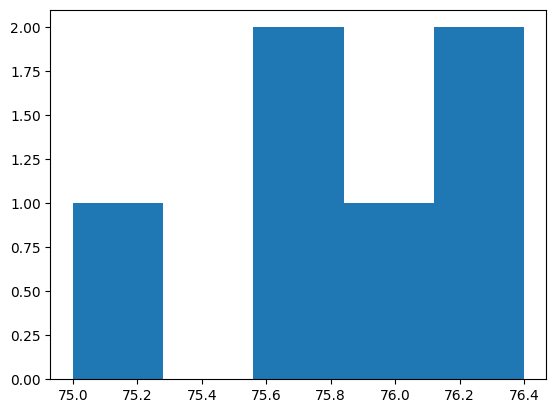

In [174]:
plt.hist(data['몸무게'], bins=5)
plt.show()

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 1 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      9 non-null      object 
 1   측정일     9 non-null      object 
 2   몸무게     6 non-null      float64
 3   단위      9 non-null      object 
 4   담당      9 non-null      object 
 5   지점      9 non-null      object 
dtypes: float64(1), object(5)
memory usage: 504.0+ bytes


In [177]:
data['몸무게']

회차
1    76.4
2    75.7
3    76.0
4     NaN
5    76.2
6    75.7
7     NaN
8     NaN
9    75.0
Name: 몸무게, dtype: float64

In [178]:
data["지점"].unique()

array(['관악구', '여의도', '강남구', '서초구'], dtype=object)

In [179]:
data["지점"].value_counts()                 # Unique 갯수 표시

지점
서초구    4
관악구    2
여의도    2
강남구    1
Name: count, dtype: int64

In [180]:
data["지점"].value_counts(normalize = True)*100 # Unique 비율표시

지점
서초구    44.444444
관악구    22.222222
여의도    22.222222
강남구    11.111111
Name: proportion, dtype: float64

In [42]:
data

,이름,측정일,몸무게,단위,담당,지점
회차,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구
2,홍길동,2020-03-02,75.7,kg,김길동,관악구
3,홍길동,2020-03-03,76.0,kg,고길동,여의도
4,홍길동,2020-03-04,NaN,kg,고길동,여의도
5,홍길동,2020-03-05,76.2,kg,김길동,강남구
6,홍길동,2020-03-06,75.7,kg,고길동,서초구
7,홍길동,2020-03-07,NaN,kg,고길동,서초구
8,홍길동,2020-03-08,NaN,kg,김길동,서초구
9,홍길동,2020-03-09,75.0,kg,김길동,서초구


만일 특정 컬럼의 값을 수정하고 싶다면 ```replace```를 사용하면 됩니다.

In [184]:
# '강남구'라고 적힌 값을 '강남'으로 통일해주기 위해 replace를 사용합니다. 
# 이를 '지점' 컬럼에 다시 대입하여 수정합니다.
data["지점"] = data["지점"].replace("강남구", "강남")
data["지점"] = data["지점"].replace("강남", "강남구").replace('서초구','서초').replace('관악구','관악').replace('여의도','여의나루')
# 이제 '강남구'가 '강남'으로 바꿘 것을 확인할 수 있습니다.
data

,이름,측정일,몸무게,단위,담당,지점
회차,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악
2,홍길동,2020-03-02,75.7,kg,김길동,관악
3,홍길동,2020-03-03,76.0,kg,고길동,여의나루
4,홍길동,2020-03-04,NaN,kg,고길동,여의나루
5,홍길동,2020-03-05,76.2,kg,김길동,강남구
6,홍길동,2020-03-06,75.7,kg,고길동,서초
7,홍길동,2020-03-07,NaN,kg,고길동,서초
8,홍길동,2020-03-08,NaN,kg,김길동,서초
9,홍길동,2020-03-09,75.0,kg,김길동,서초


### [중요]

데이터를 보면 비어있는(```NaN```) 값이 있는데, 이런 값을 채워주고 싶다면 ```fillna```라는 기능을 사용할 수 있습니다.

참고 : https://m.blog.naver.com/youji4ever/221791455668

In [81]:
# 몸무게가 비어있는(NaN) 데이터에 한해서 75.8 kg로 채워줍니다.
# 이를 '몸무게(fill)'이라는 새로운 컬럼에 추가해줍니다.
data['몸무게(fill)'] = data['몸무게'].fillna(75.8)
# 이제 NaN값이 75.8로 바뀐 것을 알 수 있습니다.
data

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next)
회차,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,75.7,76.4,76.0
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,76.0,75.7,75.8
4,홍길동,2020-03-04,NaN,kg,고길동,여의도,75.8,76.0,76.2
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7
6,홍길동,2020-03-06,75.7,kg,고길동,서초,75.7,76.2,75.8
7,홍길동,2020-03-07,NaN,kg,고길동,서초,75.8,75.7,75.8
8,홍길동,2020-03-08,NaN,kg,김길동,서초,75.8,75.8,75.0
9,홍길동,2020-03-09,75.0,kg,김길동,서초,75.0,75.8,NaN


### [중요]


또 다른 재미있는 기능은 ```.shift()``` 입니다. 이 기능은 전체 데이터를 기준으로 앞 행(row)의 데이터와 뒤 행(row)의 데이터를 가져옵니다. 앞 행의 데이터는 ```.shift()``` 또는 ```.shift(+1)```으로, 뒤 행의 데이터는 ```.shift(-1)```으로 가져올 수 있습니다.

참고 : https://wikidocs.net/47450

In [82]:
# .shift(+1)으로 이전 날짜의 몸무게를 가져옵니다.
# 혹시나 이전 기록이 없다면(=첫 번째 데이터) NaN을 가져옵니다.
data['몸무게(fill)(prev)'] = data['몸무게(fill)'].shift(+1)

# .shift(-1)으로 다음 날짜의 몸무게를 가져옵니다.
# 혹시나 다음 기록이 없다면(=마지막 데이터) NaN을 가져옵니다.
data['몸무게(fill)(next)'] = data['몸무게(fill)'].shift(-1)

# 이전 몸무게와 다음 몸무게가 추가된 것을 확인할 수 있습니다.
data

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next)
회차,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,75.7,76.4,76.0
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,76.0,75.7,75.8
4,홍길동,2020-03-04,NaN,kg,고길동,여의도,75.8,76.0,76.2
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7
6,홍길동,2020-03-06,75.7,kg,고길동,서초,75.7,76.2,75.8
7,홍길동,2020-03-07,NaN,kg,고길동,서초,75.8,75.7,75.8
8,홍길동,2020-03-08,NaN,kg,김길동,서초,75.8,75.8,75.0
9,홍길동,2020-03-09,75.0,kg,김길동,서초,75.0,75.8,NaN


In [83]:
### 전일 대비 몸무게 증가량 계산
data["몸무게(fill)"]-data["몸무게(fill)(prev)"]

회차
1    NaN
2   -0.7
3    0.3
4   -0.2
5    0.4
6   -0.5
7    0.1
8    0.0
9   -0.8
dtype: float64

만일 날짜 데이터가 있을 경우에는 판다스의 ```to_datetime```을 활용해서 연/월/일을 쉽게 가져올 수 있습니다.

In [85]:
data['측정일']

회차
1   2020-03-01
2   2020-03-02
3   2020-03-03
4   2020-03-04
5   2020-03-05
6   2020-03-06
7   2020-03-07
8   2020-03-08
9   2020-03-09
Name: 측정일, dtype: datetime64[ns]

In [86]:
pd.to_datetime(data['측정일'])

회차
1   2020-03-01
2   2020-03-02
3   2020-03-03
4   2020-03-04
5   2020-03-05
6   2020-03-06
7   2020-03-07
8   2020-03-08
9   2020-03-09
Name: 측정일, dtype: datetime64[ns]

In [87]:
# 판다스의 to_datetime를 사용합니다.
# 이 기능을 사용하면 이제 연/월/일을 쉽게 가져올 수 있습니다.
data['측정일'] = pd.to_datetime(data['측정일'])

In [88]:
# 연도(year) 데이터를 가져오고 싶으면 dt.year를 사용합니다.
data['측정일'].dt.year

회차
1    2020
2    2020
3    2020
4    2020
5    2020
6    2020
7    2020
8    2020
9    2020
Name: 측정일, dtype: int32

In [90]:
# 월(month) 데이터를 가져오고 싶으면 dt.month를 사용합니다.
data['측정일'].dt.month

회차
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: 측정일, dtype: int32

In [91]:
# 일(day) 데이터를 가져오고 싶으면 dt.day를 사용합니다.
data['측정일'].dt.day

회차
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: 측정일, dtype: int32

## 행렬

판다스 데이터프레임의 기본은 행렬 접근하기입니다. (참고로 행은 row, 열은 column이라고 합니다) 행렬 접근을 시도해보면 판다스의 특징을 바로 깨달을 수 있는데, 일단 1) 굉장히 간단한 문법으로 행렬을 접근할 수 있고, 2) 이 문법을 조금만 응용하면 다양한 방식으로 행렬을 가져올 수 있습니다.

먼저 열(column)을 가져오는 방법부터 배워보겠습니다.

### 열(column) 가져오기

일단 대괄호([])를 엽니다. 이 대괄호에 문자열을 집어넣으면, 문자열에 해당하는 열(column)을 반환합니다.

In [54]:
# '몸무게'라는 이름의 컬럼을 가져옵니다.
#data["몸무게"]
data['몸무게']

회차
1    76.4
2    75.7
3    76.0
4     NaN
5    76.2
6    75.7
7     NaN
8     NaN
9    75.0
Name: 몸무게, dtype: float64

컬럼 가져오기의 응용. 대괄호를 두 개(```[[]]```) 연 뒤, 컬럼명 여러개를 집어넣습니다.

In [95]:
# '이름', '측정일', '몸무게' 컬럼 세 개를 가져옵니다.

data[["이름", "측정일", "몸무게","담당"]]

,이름,측정일,몸무게,담당
회차,,,,
1,홍길동,2020-03-01,76.4,박길동
2,홍길동,2020-03-02,75.7,김길동
3,홍길동,2020-03-03,76.0,고길동
4,홍길동,2020-03-04,NaN,고길동
5,홍길동,2020-03-05,76.2,김길동
6,홍길동,2020-03-06,75.7,고길동
7,홍길동,2020-03-07,NaN,고길동
8,홍길동,2020-03-08,NaN,김길동
9,홍길동,2020-03-09,75.0,김길동


위의 컬럼 여러개 가져오기는 파이썬의 리스트(list)를 응용한 것입니다. 위의 코드와 아래의 코드는 사실상 동일합니다.

In [99]:
# 리스트를 하나 만드는데, 리스트 안에 컬럼 이름 여러개('이름', '측정 일자', '몸무게')를 집어넣습니다.
# 이후 판다스 데이터프레임에서 대괄호를 하나 열고([]) 그 안에 리스트를 집어넣습니다.
columns = ["이름", "측정일", "몸무게"]
data[columns]

,이름,측정일,몸무게
회차,,,
1,홍길동,2020-03-01,76.4
2,홍길동,2020-03-02,75.7
3,홍길동,2020-03-03,76.0
4,홍길동,2020-03-04,NaN
5,홍길동,2020-03-05,76.2
6,홍길동,2020-03-06,75.7
7,홍길동,2020-03-07,NaN
8,홍길동,2020-03-08,NaN
9,홍길동,2020-03-09,75.0


In [98]:
#data['회차']
data.index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='회차')

컬럼을 가져올 때 주의해야 할 것이 있습니다. '회차'는 이제 컬럼이 아닌 인덱스이기 때문에, 컬럼 검색으로는 가져올 수 없습니다. 이 점 주의하셔야 합니다.

In [58]:
data[['이름']]
#data['이름']

,이름
회차,
1,홍길동
2,홍길동
3,홍길동
4,홍길동
5,홍길동
6,홍길동
7,홍길동
8,홍길동
9,홍길동


In [ ]:
# '회차'는 컬럼이 아닌 인덱스이기 때문에, []로 가져오는 것이 불가능합니다.
#data["회차"]

In [59]:
data.index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='회차')

### 행(row) 가져오기

열(column) 가져오기와 비슷하나, 이번에는 .loc(locate의 약자)라는 표현을 사용합니다.

In [60]:
# loc(locate)를 사용하면 이번에는 열(column)이 아니라 행(row)을 가져옵니다.
# 다음의 코드는 '회차'가 1회차인 승객 정보를 반환합니다.|
data.loc[3]

이름                                 홍길동
측정일                2020-03-03 00:00:00
몸무게                               76.0
단위                                  kg
담당                                 고길동
지점                                 여의도
몸무게(fill)                         76.0
몸무게(fill)(prev)                   75.7
몸무게(fill)(next)                   75.8
Name: 3, dtype: object

파이썬의 슬라이싱과 비슷한 기능도 있습니다.

In [61]:
# 아래 코드는 '회차'가 1회차인 기록부터 7회차인 기록까지 반환합니다.
# 파이썬의 슬라이싱(ex: odd[0:4])과 다르게, 이번에는 '회차'가 7회차인 기록을 포함하여 출력합니다.
data.loc[4:6]

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next)
회차,,,,,,,,,
4,홍길동,2020-03-04,NaN,kg,고길동,여의도,75.8,76.0,76.2
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7
6,홍길동,2020-03-06,75.7,kg,고길동,서초,75.7,76.2,75.8


In [62]:
data.loc[[1,3,5,7,9]]

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next)
회차,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,76.0,75.7,75.8
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7
7,홍길동,2020-03-07,NaN,kg,고길동,서초,75.8,75.7,75.8
9,홍길동,2020-03-09,75.0,kg,김길동,서초,75.0,75.8,NaN


행 가져오기의 응용. 이번에는 .reindex 후 대괄호를 두 개(```[[]]```) 열고, 1, 3, 7을 넣습니다.

In [63]:
# '회차'가 1, 3, 7회차인 기록을 반환합니다.
data.reindex([1, 3, 7])

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next)
회차,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,76.0,75.7,75.8
7,홍길동,2020-03-07,NaN,kg,고길동,서초,75.8,75.7,75.8


위의 코드 역시 파이썬의 리스트(list)를 응용한 것입니다. 위의 코드와 아래의 코드는 사실상 동일합니다.

In [64]:
session_ids = [1, 3, 7]
data.reindex(session_ids)

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next)
회차,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,76.0,75.7,75.8
7,홍길동,2020-03-07,NaN,kg,고길동,서초,75.8,75.7,75.8


In [65]:
data

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next)
회차,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,75.7,76.4,76.0
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,76.0,75.7,75.8
4,홍길동,2020-03-04,NaN,kg,고길동,여의도,75.8,76.0,76.2
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7
6,홍길동,2020-03-06,75.7,kg,고길동,서초,75.7,76.2,75.8
7,홍길동,2020-03-07,NaN,kg,고길동,서초,75.8,75.7,75.8
8,홍길동,2020-03-08,NaN,kg,김길동,서초,75.8,75.8,75.0
9,홍길동,2020-03-09,75.0,kg,김길동,서초,75.0,75.8,NaN


In [66]:
# pd.reset_index()와는 다름
data.reset_index()

,회차,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next)
0,1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7
1,2,홍길동,2020-03-02,75.7,kg,김길동,관악구,75.7,76.4,76.0
2,3,홍길동,2020-03-03,76.0,kg,고길동,여의도,76.0,75.7,75.8
3,4,홍길동,2020-03-04,NaN,kg,고길동,여의도,75.8,76.0,76.2
4,5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7
5,6,홍길동,2020-03-06,75.7,kg,고길동,서초,75.7,76.2,75.8
6,7,홍길동,2020-03-07,NaN,kg,고길동,서초,75.8,75.7,75.8
7,8,홍길동,2020-03-08,NaN,kg,김길동,서초,75.8,75.8,75.0
8,9,홍길동,2020-03-09,75.0,kg,김길동,서초,75.0,75.8,NaN


### 행렬 동시에 가져오기

위의 방법을 응용하면 행(row)과 열(column)을 동시에 접근할 수 있습니다. 행렬 가져오기는 판다스의 가장 중요한 기능 중 하나이며, 이 기능을 창의적으로 응용하면 많은 일을 한 두줄의 코드로 쉽게 해결할 수 있기 때문에 반드시 숙지할 것을 권장 드립니다.

In [67]:
# 행렬 가져오기의 기본. .loc 후 콤마(,)를 기준으로
# 좌측에는 행(row)을 가져오는 조건, 우측에는 열(column)을 가져오는 조건을 넣습니다.
# 아래 코드는 '회차'가 1회차인 기록의 이름을 가져옵니다.
data.loc[1,"이름"]

'홍길동'

In [68]:
# 여러 열을 가져오기. '회차'가 1회차인 기록의 '이름', '측정일', '몸무게'를 가져옵니다.
data.loc[1, ["이름", "측정일", "몸무게"]]

이름                     홍길동
측정일    2020-03-01 00:00:00
몸무게                   76.4
Name: 1, dtype: object

In [69]:
# 여러 행을 가져오기. '회차'가 1, 3, 7회차인 기록의 '이름'을 가져옵니다.
data.loc[[1, 3, 7], "이름"]

회차
1    홍길동
3    홍길동
7    홍길동
Name: 이름, dtype: object

In [70]:
# 여러 행을 슬라이싱해서 가져오기. '회차'가 1회차부터 7회차까지인 기록의 이름을 가져옵니다.
data.loc[3:6, "이름"]

회차
3    홍길동
4    홍길동
5    홍길동
6    홍길동
Name: 이름, dtype: object

In [71]:
# 여러 행과 여러 열을 동시에 가져오기
# '회차'가 1, 3, 7회차인 기록의 '이름', '측정일', '몸무게'를 가져옵니다.
data.loc[[1, 3, 7], ["이름", "측정일", "몸무게"]]

,이름,측정일,몸무게
회차,,,
1,홍길동,2020-03-01,76.4
3,홍길동,2020-03-03,76.0
7,홍길동,2020-03-07,NaN


## 색인(인덱스)

다음으로 배울 기능은 판다스의 색인(Indexing)입니다. 색인은 판다스의 꽃이라고 불리울 수 있는 강력한 기능인데, 위의 컬럼 접근하는 기능을 약간만 응용하면 매우 쉬운 방식으로 데이터를 색인할 수 있습니다.




In [72]:
# 담당 선생님이 박길동인 데이터를 가져옵니다.
# data["담당"] == "박길동"은 담당 선생님이 박길동이면 True, 아니면 False로 이루어진 리스트 값입니다.
# 이 리스트를 data[] 의 괄호 안에 넣어주면 값이 True인 데이터만 가져오고 False인 데이터는 버리는데
# 이게 판다스 색인의 원리입니다.
#data[data["담당"] == "박길동"]
data[data['담당'] == '고길동']

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next)
회차,,,,,,,,,
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,76.0,75.7,75.8
4,홍길동,2020-03-04,NaN,kg,고길동,여의도,75.8,76.0,76.2
6,홍길동,2020-03-06,75.7,kg,고길동,서초,75.7,76.2,75.8
7,홍길동,2020-03-07,NaN,kg,고길동,서초,75.8,75.7,75.8


위 색인의 원리를 응용하면 정말 쉬운 방식으로 다양한 값을 찾을 수 있습니다.

In [73]:
# 몸무게가 75.0 kg보다 큰 데이터를 가져옵니다.
data[data["몸무게"] > 76]
#data["몸무게"] > 76

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next)
회차,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7


판다스 색인을 할 때는 데이터의 타입을 명확하게 지정해줘야 합니다. 앞서 파이썬에서 1(정수형 1)과 "1"(문자열 1)은 다르듯이, 판다스 색인에서도 정수형과 문자열을 명확히 구분해서 사용해줘야 합니다.

In [74]:
# 몸무게가 75.0 kg보다 높은(초과) 데이터를 가져옵니다.
# 여기서 객실 몸무게는 정수형인데, "75"은 문자열이므로
# "다른 형식의 데이터 타입으로 비교하였다" (invalid type comparison) 는 에러가 나면서 실행이 중단됩니다.
#data[data["몸무게"] > "75"]

In [75]:
# 단위이 kg인 데이터만 가져옵니다.
data[data["단위"] == "kg"]
#data["단위"] == "kg"
#data[data["지점"] == "여의도"]

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next)
회차,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,75.7,76.4,76.0
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,76.0,75.7,75.8
4,홍길동,2020-03-04,NaN,kg,고길동,여의도,75.8,76.0,76.2
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7
6,홍길동,2020-03-06,75.7,kg,고길동,서초,75.7,76.2,75.8
7,홍길동,2020-03-07,NaN,kg,고길동,서초,75.8,75.7,75.8
8,홍길동,2020-03-08,NaN,kg,김길동,서초,75.8,75.8,75.0
9,홍길동,2020-03-09,75.0,kg,김길동,서초,75.0,75.8,NaN


In [76]:
# 단, 여기서 판다스(그리고 파이썬)은 대소문자 구분이 굉장히 민감하기 때문에 이를 정확하게 맞춰줘야 합니다.
# 즉, kg가 아닌 Kg로 검색하면 대소문자가 맞지 않기 때문에 아무 데이터도 나오지 않습니다.
data[data["단위"] == "Kg"]

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next)
회차,,,,,,,,,


이제부터는 몇 가지 기능을 추가해서 더 다양한 방식으로 데이터를 색인해보도록 하겠습니다.

In [77]:
# isin() 함수를 사용합니다. 이 함수에는 리스트 값이 들어가는데,
# 리스트 안에 있는 값들 중 하나라도 있으면 True, 아니면 False를 반환합니다.
# isin을 응용하면 담당 선생님 어려 명을 한 번에 검색할 수 있습니다.
data[data["담당"].isin(["박길동", "김길동"])]
#data["담당"].isin(["박길동", "김길동"])

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next)
회차,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,75.7,76.4,76.0
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7
8,홍길동,2020-03-08,NaN,kg,김길동,서초,75.8,75.8,75.0
9,홍길동,2020-03-09,75.0,kg,김길동,서초,75.0,75.8,NaN


판다스 색인의 경우 소괄호(```()```)와 대괄호(```[]```)의 조합이 복잡하기 때문에 개발자가 실수할 여지가 많습니다. 그러므로 색인 코드를 작성할 때는 아래처럼 다소 코드가 길더라도 한 줄에 하나의 기능만 실행하는 것을 권장합니다. 이렇게 하면 코드가 더 직관적이고 명확하기 때문에, 개발자가 실수를 일으킬 여지가 줄어듭니다.

In [78]:
# 위 코드는 이렇게 세 줄로 풀어서 사용할 수 있습니다.
people = ["박길동", "김길동"]
people_isin = data["담당"].isin(people)
data[people_isin]

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next)
회차,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,75.7,76.4,76.0
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7
8,홍길동,2020-03-08,NaN,kg,김길동,서초,75.8,75.8,75.0
9,홍길동,2020-03-09,75.0,kg,김길동,서초,75.0,75.8,NaN


이번에는 색인에서 응용할 수 있는 새로운 기능을 하나 더 배워보겠습니다. 이번에 배울 기능은 ```str.contains```입니다. 이 기능은 보통 문자열 컬럼에서 자주 사용하는데, 문자열 컬럼에 특정 문자열이 포함(contains) 되어있을 경우에는 True, 아닌 경우에는 False를 반환합니다.

In [ ]:
# 담당이 김씨이면 True, 아니면 False로 간주합니다.
kim_contains = data["담당"].str.contains("김")
# 판다스의 색인 기능을 실행하면 담당자가 김씨인 기록만 가져올 수 있습니다.
data[kim_contains]

이번에는 컬럼 안의 내용이 비어있는지 여부를 확인하겠습니다.

판다스는 비어있는 데이터를 ```NaN```이라고 표기합니다. ```NaN```은 Not a Number의 약자라고 보시면 됩니다. 또는 비어있는 데이터를 ```null```이라고도 표현합니다.

다음은 몸무게가 비어있는 기록만을 반환하는 코드입니다.

In [ ]:
# 몸무게가 비어있으면(NaN) True, 비어있지 않으면 False를 반환합니다.
null_weight = data["몸무게"].isnull()
# 판다스의 색인 기능을 실행하면 몸무게가 비어있는(NaN) 데이터만을 반환합니다.
data[null_weight]

In [ ]:
data[data["몸무게"].isnull()]

정 반대의 기능은 ```notnull``` 입니다. 이 기능은 몸무게가 비어있지 않으면 True, 비어있으면 False를 반환합니다.

In [ ]:
# 몸무게가가 비어있지 않으면 True, 비어있으면 False를 반환합니다.
weight_exists = data["몸무게"].notnull()
data[weight_exists]

다른 방식으로도 ```not_null```을 표현할 수 있습니다. 바로 물결 표시(~)입니다. 

물결 표시(~)는 판다스를 색인할 때 True를 False로, False를 True로 뒤집어줍니다. 

이렇게 하면 not_null을 사용해도 물결 표시(~)를 통해 null과 동일한 효과를 낼 수 있습니다.

In [ ]:
# not_null을 사용하였지만 물결 표시(~)로 결과를 뒤집어줬습니다.
# 그런고로 isnull과 동일한 결과가 나옵니다.
null_weight = ~data["몸무게"].notnull()
# 색인을 실행하면 몸무게가 비어있는(NaN) 기록만 가져옵니다.
data[null_weight]

In [ ]:
data[~data["몸무게"].notnull()]

색인을 할 때는 여러 조건을 동시에 넣을 수 있습니다. 여러 조건을 넣을 때는 ```&```(and, shift + 7)와 ```|```(or, shift + \\ (대괄호 닫는 버튼 오른쪽에 있는 버튼))를 사용합니다. 
##### 한 가지 주의해야 할 점은, 조건을 여러개 넣을 땐 서로간의 충돌이 생길 수 있기 때문에 언제나 조건마다 괄호를 넣어줘야 합니다. 다만 조건을 여러 개의 변수로 쪼개서 사용하면 괄호를 사용하지 않아도 무방합니다.

In [101]:
data["몸무게"] > 75.5

회차
1     True
2     True
3     True
4    False
5     True
6     True
7    False
8    False
9    False
Name: 몸무게, dtype: bool

In [102]:
data["담당"] == "김길동"

회차
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
9     True
Name: 담당, dtype: bool

In [ ]:
# 많은 분들이 실수하시는 판다스의 색인을 잘못 사용한 사례
# and는 파이썬의 문법이기 때문에 판다스에서는 동작하지 않습니다. 판다스에서는 and가 아닌 & 표시를 사용합니다.
#data["몸무게"] > 75.5 and data["담당"] == "김길동"

In [100]:
# 위 코드에서 and는 &로 바꿔줘야 합니다.
# 하지만 판다스에서는 문법상의 이유로 인해 두 개의 조건을 &로 묶으면 잘 동작하지 않는 경우가 있습니다.
#data["몸무게"] > 75.5 & data["담당"] == "김길동"
(data["몸무게"] > 75.5) & (data["담당"] == "김길동")

회차
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
9    False
dtype: bool

In [ ]:
# 그래서 언제나 &(and)나 |(or)를 사용할때는 모든 조건을 괄호로 묶어줘야 잘 동작합니다.
# 아래 코드는 담당이 홍길동님이고, 몸무게가 75.5 kg 이상인 모든 기록을 가져옵니다.
data[(data["몸무게"] > 75.5) & (data["담당"] == "김길동")]

In [ ]:
# 위 코드를 풀어서 여러 줄의 코드로 나눠서 사용했습니다.
# 이 방식이 앞선 방식보다 훨씬 직관적이며 간결합니다. 그러므로 아래와 같은 방식으로 코드를 작성하는걸 추천드립니다.
high_weight = data["몸무게"] > 75.5
person_kim = data["담당"] == "김길동"
data[high_weight & person_kim]

In [ ]:
high_weight & person_kim

In [ ]:
# &(and)와 동일한 방식으로 or(|)를 사용할 수 있습니다.
# 아래 코드는 담당이 김길동님이거나, 그렇지 않다면 몸무게가 75.5 kg 이상인 모든 기록을 가져옵니다.
data[high_weight | person_kim]

판다스의 색인과 행렬검색의 ```loc```를 응용하면, 특정 조건으로 컬럼을 검색하는 것도 가능합니다.

In [103]:
# 담당이 김길동인 모든 기록의 몸무게를 가져옵니다.
# loc를 사용하면 이렇게 조건으로 색인을 한 뒤 컬럼을 검색할 수도 있습니다.
data.loc[data["담당"] == "김길동", "몸무게"]

회차
2    75.7
5    76.2
8     NaN
9    75.0
Name: 몸무게, dtype: float64

In [ ]:
# 비슷한 방식으로 이번에는 여러 개의 컬럼('이름', '측정일', '몸무게')를 검색합니다.
data.loc[data["담당"] == "김길동", ["이름", "측정일", "몸무게"]]

### pivot_table

이번에 다룰 통계분석 기능은 [pivot_table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)입니다. ```pivot_table```은 우리가 엑셀(Excel)에서 자주 다루던 그 ```pivot_table```과 거의 동일한 기능입니다.

In [ ]:
# pivot_table을 실행합니다. index에는 담당 컬럼을, values에는 몸무게 컬럼을 집어넣습니다.
# 이렇게 하면 각 담당자마다의 평균 몸무게가 나옵니다.
pd.pivot_table(data, index="담당", values="몸무게")

```pivot_table```에서 ```index```, ```values``` 모두 여러 개의 컬럼을 추가할 수 있습니다. 이 경우에는 리스트(```[]```)를 사용합니다.

In [ ]:
# pivot_table을 실행합니다. 이번에는 index에 지점과 담당 컬럼을 동시에 집어넣습니다.
# 이렇게 하면 각 지점과 담당자마다의 평균 몸무게가 나옵니다.
pd.pivot_table(data, index=["지점", "담당"], values="몸무게")

만일 평균(```mean```)이 아닌 다른 통계 연산을 하고 싶다면, ```aggfunc``` 옵션을 사용하면 됩니다.

In [104]:
# pandas에 이은, numpy 라는 새로운 패키지를 읽어옵니다.
# numpy는 공식적으로는 선형대수(linear algebra) 패키지이지만, 지금은 편하게 수학 연산을 쉽게 해주는 패키지라고 이해하셔도 무방합니다.
import numpy as np

In [105]:
# pivot_table을 실행합니다. 이번에는 aggfunc에 np.sum을 집어넣습니다.
# 이렇게 하면 각 지점과 담당자마다의 몸무게의 누적치(sum)가 나옵니다.
pd.pivot_table(data, index=["지점"], values="몸무게", aggfunc=np.sum)

C:\Users\CDL\AppData\Local\Temp\ipykernel_13032\465946639.py:3: FutureWarning: The provided callable <function sum at 0x0000020C89A42480> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(data, index=["지점"], values="몸무게", aggfunc=np.sum)


,몸무게
지점,
강남구,76.2
관악구,152.1
서초,150.7
여의도,76.0


### 컬럼 추가 & 수정

판다스에서 컬럼을 추가하는 기능과 수정하는 기능은 간단합니다. 재미있는 건 1) 컬럼을 추가하거나 수정하는데 배워야 하는 기능은 거의 없으며, 2) 컬럼을 추가하는 코드와 수정하는 코드는 사실상 동일합니다.

아래의 코드에서는 컬럼을 추가하는 기능만 다루도록 하겠습니다. (하지만 동일한 코드를 컬럼을 수정할 때 사용할 수 있습니다)

새로운 컬럼을 추가하고 수정할 수 있습니다.

In [106]:
# 컬럼 안에 들어가는 값이 모두 동일하다면, 파이썬에서 변수에 값을 할당하는 것과 동일한 문법으로 컬럼을 추가할 수 있습니다.
# 아래 코드는 '지역'이라는 이름의 새로운 컬럼을 추가하고, 해당 컬럼에 "서울"이라는 값을 대입합니다.
data["지역"] = "서울"

# 데이터의 지역 컬럼만 출력합니다.
# 컬럼 안에 있는 모든 값에 '서울' 이라고 들어가 있는 것을 확인할 수 있습니다.
data

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next),지역
회차,,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7,서울
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,75.7,76.4,76.0,서울
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,76.0,75.7,75.8,서울
4,홍길동,2020-03-04,NaN,kg,고길동,여의도,75.8,76.0,76.2,서울
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7,서울
6,홍길동,2020-03-06,75.7,kg,고길동,서초,75.7,76.2,75.8,서울
7,홍길동,2020-03-07,NaN,kg,고길동,서초,75.8,75.7,75.8,서울
8,홍길동,2020-03-08,NaN,kg,김길동,서초,75.8,75.8,75.0,서울
9,홍길동,2020-03-09,75.0,kg,김길동,서초,75.0,75.8,NaN,서울


판다스에서 컬럼을 추가하는 가장 기본적인 룰은 **갯수만 맞으면 무조건 들어간다** 입니다. 가령 현재 데이터의 개수는 9개인데, 어떤 데이터 형식이건 상관 없이 9개로 된 데이터를 넣어주면 새로운 컬럼을 추가할 수 있습니다.

In [107]:
# 아이디라는 새로운 컬럼을 추가하고, 여기에 파이썬의 리스트를를 사용하여 1부터 9까지의 숫자를 대입합니다.
#data["아이디"] = [1, 2, 3, 4, 5, 6, 7, 8]
data["아이디"] = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# 데이터의 아이디 컬럼만 출력합니다.
# 1부터 시작해서 값이 하나씩 늘어나며 추가되는 것을 확인할 수 있습니다.
data

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next),지역,아이디
회차,,,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7,서울,1
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,75.7,76.4,76.0,서울,2
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,76.0,75.7,75.8,서울,3
4,홍길동,2020-03-04,NaN,kg,고길동,여의도,75.8,76.0,76.2,서울,4
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7,서울,5
6,홍길동,2020-03-06,75.7,kg,고길동,서초,75.7,76.2,75.8,서울,6
7,홍길동,2020-03-07,NaN,kg,고길동,서초,75.8,75.7,75.8,서울,7
8,홍길동,2020-03-08,NaN,kg,김길동,서초,75.8,75.8,75.0,서울,8
9,홍길동,2020-03-09,75.0,kg,김길동,서초,75.0,75.8,NaN,서울,9


이제부터 위에서 배운 내용을 응용하여 컬럼을 추가하는 다양한 방법에 대해 살펴보겠습니다.

먼저 kg을 gram으로 바꿔주는 방식입니다. 판다스의 데이터는 기본적인 연산은 대부분 지원되므로, 편하게 1,000을 곱해준 뒤 새로운 컬럼에 추가해주면 됩니다.

In [108]:
# '몸무게' 컬럼에 100을 곱해줍니다. 이를 '몸무게(gram)'라는 이름의 새로운 컬럼에 추가해줍니다.
data["몸무게(gram)"] = data["몸무게"] * 1000

# 몸무게(gram) 컬럼이 새롭게 추가된 것을 알 수 있습니다.
data

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next),지역,아이디,몸무게(gram)
회차,,,,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7,서울,1,76400.0
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,75.7,76.4,76.0,서울,2,75700.0
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,76.0,75.7,75.8,서울,3,76000.0
4,홍길동,2020-03-04,NaN,kg,고길동,여의도,75.8,76.0,76.2,서울,4,NaN
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7,서울,5,76200.0
6,홍길동,2020-03-06,75.7,kg,고길동,서초,75.7,76.2,75.8,서울,6,75700.0
7,홍길동,2020-03-07,NaN,kg,고길동,서초,75.8,75.7,75.8,서울,7,NaN
8,홍길동,2020-03-08,NaN,kg,김길동,서초,75.8,75.8,75.0,서울,8,NaN
9,홍길동,2020-03-09,75.0,kg,김길동,서초,75.0,75.8,NaN,서울,9,75000.0


하지만 현실적으로, 판다스에서 컬럼을 추가할 때 가장 많이 하는 것은 조건마다 컬럼을 추가하는 것입니다. 
가령 "A라는 조건에는 1이라는 값을 넣어주고, B라는 조건에는 2라는 값을 넣어준다."라는 방식을 사용하는 경우가 많습니다.
이렇게 조건별로 컬럼을 추가해주는 방식은 크게 두 가지로 나뉠 수 있는데, 
첫 번째는 각 조건마다 컬럼을 하나씩 추가하는 방법이며, 
두 번째는 컬럼은 하나인데 그 안에 조건마다 값이 다르게 들어가는 방법입니다. 

- 먼저 첫 번째 방식으로 컬럼을 추가해보겠습니다.

In [109]:
# 몸무게를 전처리 데이터로 바꾸어주기
data["몸무게"] = data["몸무게(fill)"]

In [112]:
data["몸무게"] > 75.6

회차
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9    False
Name: 몸무게, dtype: bool

In [111]:
# 몸무게가 75.6 kg보다 크면 True이고, 그렇지 않으면 False인 데이터를 만듭니다.
# 이 결과를 '비만'이라는 이름의 새로운 컬럼에 추가합니다.
data["비만"] = data["몸무게"] > 75.6

# '몸무게'와 '비만' 컬럼을 동시에 출력합니다.
data[["몸무게", "비만"]]

,몸무게,비만
회차,,
1,76.4,True
2,75.7,True
3,76.0,True
4,75.8,True
5,76.2,True
6,75.7,True
7,75.8,True
8,75.8,True
9,75.0,False


- 이번에는 2번 방식으로 컬럼을 추가해보겠습니다. 
1번 방식과 비슷하지만, 이번에는 '상태'라는 컬럼을 추가한 뒤, 75.6 kg 보다 크면 '비만', 그렇지 않으면 '정상'이라는 값이 들어가는 컬럼을 추가해보겠습니다.

In [115]:
data["몸무게"] > 75.6
data.loc[data["몸무게"] > 75.6, "비만"]
## 새로운 컬럼
data.loc[data["몸무게"] > 75.6, "상태"] = "비만"

In [ ]:
data.loc[data["몸무게"] > 75.6, "상태"] = '비만'

In [119]:
data

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next),지역,아이디,몸무게(gram),비만,상태
회차,,,,,,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7,서울,1,76400.0,True,비만
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,75.7,76.4,76.0,서울,2,75700.0,True,비만
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,76.0,75.7,75.8,서울,3,76000.0,True,비만
4,홍길동,2020-03-04,75.8,kg,고길동,여의도,75.8,76.0,76.2,서울,4,NaN,True,비만
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7,서울,5,76200.0,True,비만
6,홍길동,2020-03-06,75.7,kg,고길동,서초,75.7,76.2,75.8,서울,6,75700.0,True,비만
7,홍길동,2020-03-07,75.8,kg,고길동,서초,75.8,75.7,75.8,서울,7,NaN,True,비만
8,홍길동,2020-03-08,75.8,kg,김길동,서초,75.8,75.8,75.0,서울,8,NaN,True,비만
9,홍길동,2020-03-09,75.0,kg,김길동,서초,75.0,75.8,NaN,서울,9,75000.0,False,정상


In [117]:
data.loc[data["몸무게"] <= 75.6, "상태"] = "정상"

In [118]:
data

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next),지역,아이디,몸무게(gram),비만,상태
회차,,,,,,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7,서울,1,76400.0,True,비만
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,75.7,76.4,76.0,서울,2,75700.0,True,비만
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,76.0,75.7,75.8,서울,3,76000.0,True,비만
4,홍길동,2020-03-04,75.8,kg,고길동,여의도,75.8,76.0,76.2,서울,4,NaN,True,비만
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7,서울,5,76200.0,True,비만
6,홍길동,2020-03-06,75.7,kg,고길동,서초,75.7,76.2,75.8,서울,6,75700.0,True,비만
7,홍길동,2020-03-07,75.8,kg,고길동,서초,75.8,75.7,75.8,서울,7,NaN,True,비만
8,홍길동,2020-03-08,75.8,kg,김길동,서초,75.8,75.8,75.0,서울,8,NaN,True,비만
9,홍길동,2020-03-09,75.0,kg,김길동,서초,75.0,75.8,NaN,서울,9,75000.0,False,정상


In [120]:
data[["몸무게", "비만", "상태"]]

,몸무게,비만,상태
회차,,,
1,76.4,True,비만
2,75.7,True,비만
3,76.0,True,비만
4,75.8,True,비만
5,76.2,True,비만
6,75.7,True,비만
7,75.8,True,비만
8,75.8,True,비만
9,75.0,False,정상


이번에는 위의 방식을 응용하여 구역을 세부적으로 나눠보겠습니다. '몸무게' 컬럼을 활용하여 새로운 컬럼을 만들고 싶습니다.

  * 몸무게가 75.5 kg 미만이면 목표 초과 달성
  * 몸무게가 75.5 kg 이상이되, 76.0 kg 이하면 목표 달성
  * 몸무게가 76.0 kg 초과이면 목표 달성 실패
  
이 방식이 방식도 1번 방식과 2번 방식 모두 가능합니다. 먼저 1번 방식으로 해보겠습니다.

In [122]:
# 몸무게가 75.5 kg 미만이면 True, 아니면 False인 리스트를 만듭니다.
# 이 결과를 목표초과라는 이름의 새로운 컬럼에 할당합니다.
data["목표초과"] = data["몸무게"] < 75.5
data.head()

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next),지역,아이디,몸무게(gram),비만,상태,목표달성,목표초과
회차,,,,,,,,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7,서울,1,76400.0,True,비만,False,False
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,75.7,76.4,76.0,서울,2,75700.0,True,비만,True,False
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,76.0,75.7,75.8,서울,3,76000.0,True,비만,True,False
4,홍길동,2020-03-04,75.8,kg,고길동,여의도,75.8,76.0,76.2,서울,4,NaN,True,비만,True,False
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7,서울,5,76200.0,True,비만,False,False


In [121]:
# 비슷한 방식으로, 몸무게가 75.5 kg 이상이고 76.0 kg 미만이면 True, 아니면 False인 리스트를 만듭니다.
# 마찬가지로 목표달성라는 이름의 새로운 컬럼에 할당합니다.
data["목표달성"] = (data["몸무게"] >= 75.5) & (data["몸무게"] <= 76.0)
data.head()

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next),지역,아이디,몸무게(gram),비만,상태,목표달성
회차,,,,,,,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7,서울,1,76400.0,True,비만,False
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,75.7,76.4,76.0,서울,2,75700.0,True,비만,True
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,76.0,75.7,75.8,서울,3,76000.0,True,비만,True
4,홍길동,2020-03-04,75.8,kg,고길동,여의도,75.8,76.0,76.2,서울,4,NaN,True,비만,True
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7,서울,5,76200.0,True,비만,False


In [123]:
# 마찬가지로, 몸무게가 76.0 kg 초과면 True, 아니면 False인 리스트를 만듭니다.
# 이를 목표실패는 컬럼에 할당합니다.
data["목표실패"] = data["몸무게"] > 76.0
data.head()

,이름,측정일,몸무게,단위,담당,지점,몸무게(fill),몸무게(fill)(prev),몸무게(fill)(next),지역,아이디,몸무게(gram),비만,상태,목표달성,목표초과,목표실패
회차,,,,,,,,,,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,76.4,NaN,75.7,서울,1,76400.0,True,비만,False,False,True
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,75.7,76.4,76.0,서울,2,75700.0,True,비만,True,False,False
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,76.0,75.7,75.8,서울,3,76000.0,True,비만,True,False,False
4,홍길동,2020-03-04,75.8,kg,고길동,여의도,75.8,76.0,76.2,서울,4,NaN,True,비만,True,False,False
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,76.2,75.8,75.7,서울,5,76200.0,True,비만,False,False,True


In [124]:
# 몸무게와 그 관련 컬럼(목표초과, 목표달성, 목표실패)을 출력합니다.
data[["몸무게", "목표초과", "목표달성", "목표실패"]]

,몸무게,목표초과,목표달성,목표실패
회차,,,,
1,76.4,False,False,True
2,75.7,False,True,False
3,76.0,False,True,False
4,75.8,False,True,False
5,76.2,False,False,True
6,75.7,False,True,False
7,75.8,False,True,False
8,75.8,False,True,False
9,75.0,True,False,False


In [125]:
# 검증
data[["목표초과", "목표달성", "목표실패"]].sum(axis=1)

회차
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
dtype: int64

이번에는 2번 방식으로 해보겠습니다.

In [ ]:
# 1) data["몸무게"] < 75.5  먼저 판다스의 색인 기능을 활용해서, 몸무게가 75.5 kg 미만이면 True, 그렇지 않으면 False인 리스트를 만듭니다.
# 2) data[data["몸무게"] < 75.5]  이 리스트를 통해 몸무게가 75.5kg 미만인 데이터를 색인하고, 
# 3) data.loc[data["몸무게"] < 75.5, "목표"] 이 후 판다스 행렬 검색에서 사용한 loc를 활용하여, '목표'라는 이름의 컬럼에 접근합니다.
# 4) data.loc[data["몸무게"] < 75.5, "목표"] = "초과"  비록 '목표'라는 이름의 컬럼은 없지만, 이 컬럼에 "초과"라는 데이터를 넣음으로서 새로운 컬럼을 생성합니다.
data.loc[data["몸무게"] < 75.5, "목표"] = "초과"
data[["몸무게", "목표초과", "목표달성", "목표실패", '목표']]

In [126]:
# 유사한 방식으로 몸무게 75.5 kg 이상, 76.0 kg 이하일 경우 '목표' 컬럼에 달성이라는 값을 넣습니다.
data.loc[(data["몸무게"] >= 75.5) & (data["몸무게"] <= 76.0), "목표"] = "달성"
data[["몸무게", "목표초과", "목표달성", "목표실패", '목표']]

,몸무게,목표초과,목표달성,목표실패,목표
회차,,,,,
1,76.4,False,False,True,NaN
2,75.7,False,True,False,달성
3,76.0,False,True,False,달성
4,75.8,False,True,False,달성
5,76.2,False,False,True,NaN
6,75.7,False,True,False,달성
7,75.8,False,True,False,달성
8,75.8,False,True,False,달성
9,75.0,True,False,False,NaN


In [127]:
# 비슷하게 운임요금이 76.0 kg 이상인 경우 '목표' 컬럼에 달성이라는 값을 넣습니다.
data.loc[data["몸무게"] > 76.0, "목표"] = "미만"
data[["몸무게", "목표초과", "목표달성", "목표실패", '목표']]

,몸무게,목표초과,목표달성,목표실패,목표
회차,,,,,
1,76.4,False,False,True,미만
2,75.7,False,True,False,달성
3,76.0,False,True,False,달성
4,75.8,False,True,False,달성
5,76.2,False,False,True,미만
6,75.7,False,True,False,달성
7,75.8,False,True,False,달성
8,75.8,False,True,False,달성
9,75.0,True,False,False,NaN


In [128]:
# '몸무게'와 '목표' 컬럼을 출력합니다.
data[["몸무게", "목표"]]

,몸무게,목표
회차,,
1,76.4,미만
2,75.7,달성
3,76.0,달성
4,75.8,달성
5,76.2,미만
6,75.7,달성
7,75.8,달성
8,75.8,달성
9,75.0,NaN


지금까지 배운 내용을 응용한다면, 다음과 같은 방식으로 빈 값(```NaN```)에 원하는 값을 채워넣을 수 있습니다.

In [129]:
data["몸무게"].isnull()

회차
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: 몸무게, dtype: bool

In [130]:
# '몸무게' 컬럼이 비어있는(NaN, null) 데이터의 '비만' 컬럼에 빈 값(NaN, np.nan)을 채워넣습니다.
data["비만"]=0
data.loc[data["몸무게"].isnull(), "비만"] = np.nan

# '몸무게' 컬럼과 '비만' 컬럼을 함께 보여줍니다.
data[["몸무게", "비만"]]

,몸무게,비만
회차,,
1,76.4,0.0
2,75.7,0.0
3,76.0,0.0
4,75.8,0.0
5,76.2,0.0
6,75.7,0.0
7,75.8,0.0
8,75.8,0.0
9,75.0,0.0


그리고 조건별로 컬럼을 추가할때도, 등호(```=```)의 우측에 하나의 값이 아닌 여러 개의 값을 넣어주는 것도 가능합니다.

In [132]:
data.loc[data["담당"] == "김길동", "담당회차"] = 1

In [133]:
data[["담당", "담당회차"]]

,담당,담당회차
회차,,
1,박길동,NaN
2,김길동,1.0
3,고길동,NaN
4,고길동,NaN
5,김길동,1.0
6,고길동,NaN
7,고길동,NaN
8,김길동,1.0
9,김길동,1.0


In [136]:
# 담당자명이 김지수인 데이터만 가져와서, 1회차부터 순서대로 값을 넣어줍니다. 값을 넣어줄 때는 파이썬의 리스트를 활용합니다.
data.loc[data["담당"] == "김길동", "담당회차"] = [1, 2, 3, 4]
data[["담당", "담당회차"]]

C:\Users\CDL\AppData\Local\Temp\ipykernel_13032\3524550692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data["담당"] == "김길동", "담당회차"] = [1, 2, 3, 4]


,담당,담당회차
회차,,
1,박길동,NaN
2,김길동,1.0
3,고길동,NaN
4,고길동,NaN
5,김길동,2.0
6,고길동,NaN
7,고길동,NaN
8,김길동,3.0
9,김길동,4.0


In [137]:
# 담당자명이 고길동인 데이터만 가져와서, 1회차부터 순서대로 값을 넣어줍니다. 값을 넣어줄 때는 파이썬의 리스트를 활용합니다.
data.loc[data["담당"] == "고길동", "담당회차"] = [1, 2, 3, 4]
data[["담당", "담당회차"]]

,담당,담당회차
회차,,
1,박길동,NaN
2,김길동,1.0
3,고길동,1.0
4,고길동,2.0
5,김길동,2.0
6,고길동,3.0
7,고길동,4.0
8,김길동,3.0
9,김길동,4.0


In [138]:
# 담당자명이 박길동인 데이터만 가져와서, 1회차부터 순서대로 값을 넣어줍니다. 값을 넣어줄 때는 파이썬의 리스트를 활용합니다.
data.loc[data["담당"] == "박길동", "담당회차"] = [1]
# '담당' 컬럼과 '담당회차' 컬럼을 출력합니다.
data[["담당", "담당회차"]]

,담당,담당회차
회차,,
1,박길동,1.0
2,김길동,1.0
3,고길동,1.0
4,고길동,2.0
5,김길동,2.0
6,고길동,3.0
7,고길동,4.0
8,김길동,3.0
9,김길동,4.0


## 컬럼 삭제하기

컬럼을 삭제하는 노하우는 간단합니다. 크게 두 가지 방법이 있는데, 첫 번째 방법은 우리가 이전에 배운 행렬 검색을 조금만 응용하면 되고, 두 번째 방법은 판다스의 ```drop```이라는 기능을 사용하면 됩니다.

가령 위에서 새롭게 추가한 몸무게 관련 컬럼들('몸무게(fill)', '몸무게(fill)(prev)', '몸무게(fill)(next)', '몸무게(gram)')과 비만 관련 컬럼들('비만', '상태', '목표초과', '목표달성', '목표실패', '목표')을 제거해보겠습니다.





In [135]:
data.columns

Index(['이름', '측정일', '몸무게', '단위', '담당', '지점', '지역', '아이디'], dtype='object')

In [134]:
# 새롭게 가져올 컬럼명이 들어있는 리스트를 생성합니다.
# 이 리스트에는 다음의 컬럼이 제거되어 있습니다.
# 몸무게 관련 컬럼들('몸무게(fill)', '몸무게(fill)(prev)', '몸무게(fill)(next)', '몸무게(gram)')
# 비만 관련 컬럼들('비만', '상태', '목표초과', '목표달성', '목표실패', '목표')
columns = ['이름', '측정일', '몸무게', '단위', '담당', '지점', '지역', '아이디']
#data[columns]

# 앞서 생성한 columns 리스트를 활용해 필요한 컬럼만 검색합니다.
# 이후 그 결과를 자기 자신에 대입합니다.
data = data[columns]

# 이제 국적 관련 컬럼과 운임요금 관련 컬럼이 삭제되어 있는 것을 확인할 수 있습니다.
data

,이름,측정일,몸무게,단위,담당,지점,지역,아이디
회차,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,서울,1
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,서울,2
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,서울,3
4,홍길동,2020-03-04,75.8,kg,고길동,여의도,서울,4
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,서울,5
6,홍길동,2020-03-06,75.7,kg,고길동,서초,서울,6
7,홍길동,2020-03-07,75.8,kg,고길동,서초,서울,7
8,홍길동,2020-03-08,75.8,kg,김길동,서초,서울,8
9,홍길동,2020-03-09,75.0,kg,김길동,서초,서울,9


두 번째 방법은 판다스의 [drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)이라는 기능을 활용하는 방법입니다. 아래의 코드는 ```data``` 데이터프레임에서 '지역'이라는 이름의 컬럼을 제거합니다.



In [139]:
# data 데이터프레임에서 '지역'이라는 이름의 컬럼을 제거합니다.
# drop으로 컬럼을 제거할때는 언제나 axis=1이라는 옵션을 넣어줘야 합니다.
# (반대로 axis=0은 컬럼이 아닌 로우(행)을 제거하는 역할을 합니다)
data.drop("지역", axis=1)

,이름,측정일,몸무게,단위,담당,지점,아이디,담당회차
회차,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,1,1.0
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,2,1.0
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,3,1.0
4,홍길동,2020-03-04,75.8,kg,고길동,여의도,4,2.0
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,5,2.0
6,홍길동,2020-03-06,75.7,kg,고길동,서초,6,3.0
7,홍길동,2020-03-07,75.8,kg,고길동,서초,7,4.0
8,홍길동,2020-03-08,75.8,kg,김길동,서초,8,3.0
9,홍길동,2020-03-09,75.0,kg,김길동,서초,9,4.0


판다스의 [drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)을 사용하면 여러 개의 컬럼을 동시에 지울 수도 있습니다.

In [140]:
# data 데이터프레임에서 '지역'과 '아이디'라는 이름의 컬럼을 제거합니다.
# 여러 컬럼을 동시에 지울때는 컬럼명을 리스트로 넣어주면 됩니다.
data.drop(["지역", "아이디"], axis=1)

,이름,측정일,몸무게,단위,담당,지점,담당회차
회차,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,1.0
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,1.0
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,1.0
4,홍길동,2020-03-04,75.8,kg,고길동,여의도,2.0
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,2.0
6,홍길동,2020-03-06,75.7,kg,고길동,서초,3.0
7,홍길동,2020-03-07,75.8,kg,고길동,서초,4.0
8,홍길동,2020-03-08,75.8,kg,김길동,서초,3.0
9,홍길동,2020-03-09,75.0,kg,김길동,서초,4.0


In [141]:
data = data.drop(["지역", "아이디"], axis=1)
data

,이름,측정일,몸무게,단위,담당,지점,담당회차
회차,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,1.0
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,1.0
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,1.0
4,홍길동,2020-03-04,75.8,kg,고길동,여의도,2.0
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,2.0
6,홍길동,2020-03-06,75.7,kg,고길동,서초,3.0
7,홍길동,2020-03-07,75.8,kg,고길동,서초,4.0
8,홍길동,2020-03-08,75.8,kg,김길동,서초,3.0
9,홍길동,2020-03-09,75.0,kg,김길동,서초,4.0


### apply 함수

판다스에는 [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)라고 하는 기능이 있습니다. 쉽게 설명하자면 판다스 버전의 반복문(for)이라고 볼 수 있는데, 판다스의 문법만으로 해결하기 어려운 일이 있다면 판다스의 ```apply```를 시도해볼 수 있습니다.

In [143]:
# band_weight라는 이름의 파이썬 함수를 만듭니다.
# 이 함수에서는 weight라는 값을 인자로 받습니다.
def band_weight(weight):
    # weight 변수에 NaN이 들어왔으면 별도의 처리를 하지 않고 NaN으로 반환합니다.
    if pd.isnull(weight):
        return np.nan
    # weight 변수에 있는 값이 75.5 kg 미만이면 '초과'라는 값을 반환합니다.
    elif weight < 75.5:
        return '초과'
    # weight 변수에 있는 값이 75.5 kg 이상이고 76.0 kg 이하면 '달성'이라는 값을 반환합니다.
    elif weight >= 75.5 and weight <= 76.0:
        return '달성'
    # 모든 조건해 해당하지 않으면 '미달'이라는 값을 반환합니다.
    else:
        return '미달'

In [144]:
# Name 컬럼에 apply를 실행합니다. 인자로는 band_weight라는 함수를 집어넣습니다.
# 이렇게 하면 전체 목표 데이터 값에 대해 band_weight를 실행한 뒤 그 결과를 반환합니다.
# 반환한 결과를 목표라는 이름의 새로운 컬럼에 집어넣습니다.
data["목표"] = data["몸무게"].apply(band_weight)

참고 : [Pandas의 DataFrame 사용 중 SettingWithCopyWarning 발생할 때](https://emilkwak.github.io/pandas-dataframe-settingwithcopywarning)

In [145]:
data[['몸무게', "목표"]]

,몸무게,목표
회차,,
1,76.4,미달
2,75.7,달성
3,76.0,달성
4,75.8,달성
5,76.2,미달
6,75.7,달성
7,75.8,달성
8,75.8,달성
9,75.0,초과


In [146]:
data1 = data.copy()
data1["목표"] = data1["몸무게"].apply(band_weight)
data1

,이름,측정일,몸무게,단위,담당,지점,담당회차,목표
회차,,,,,,,,
1,홍길동,2020-03-01,76.4,kg,박길동,관악구,1.0,미달
2,홍길동,2020-03-02,75.7,kg,김길동,관악구,1.0,달성
3,홍길동,2020-03-03,76.0,kg,고길동,여의도,1.0,달성
4,홍길동,2020-03-04,75.8,kg,고길동,여의도,2.0,달성
5,홍길동,2020-03-05,76.2,kg,김길동,강남구,2.0,미달
6,홍길동,2020-03-06,75.7,kg,고길동,서초,3.0,달성
7,홍길동,2020-03-07,75.8,kg,고길동,서초,4.0,달성
8,홍길동,2020-03-08,75.8,kg,김길동,서초,3.0,달성
9,홍길동,2020-03-09,75.0,kg,김길동,서초,4.0,초과


In [147]:
data1[["몸무게", "목표"]]

,몸무게,목표
회차,,
1,76.4,미달
2,75.7,달성
3,76.0,달성
4,75.8,달성
5,76.2,미달
6,75.7,달성
7,75.8,달성
8,75.8,달성
9,75.0,초과


In [ ]:
data

## 파일 저장하기

마지막으로 배울 것은 파일 저장하기입니다. 파일을 저장할 때는 ```to_csv```라는 함수를 활용해 저장할 수 있습니다.
다음은 판다스에서 데이터를 저장하는 방식입니다.

In [ ]:
# data 변수에 있는 데이터프레임을 저장합니다.
data.to_csv("output/data_output.csv")

이후 ```data.csv```를 보면 수정한 데이터가 성공적으로 저장되어 있는 것을 확인할 수 있습니다.